## UNICEF Malnutrition Dataset Visualization

The dataset provides comprehensive information on malnutrition levels across countries and UNICEF regions. The data is sourced from the UNICEF website: https://data.unicef.org/resources/dataset/malnutrition-data/

In [1]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load the dataset
excel_url = 'path/malnutrition.xlsx'
malnutrition_df = pd.read_excel(excel_url)
malnutrition_df.head()

ISO code Country and areas Survey year  Year* United Nations Region  \
0      AFG       AFGHANISTAN        1997   1997                  Asia   
1      AFG       AFGHANISTAN        2004   2004                  Asia   
2      AFG       AFGHANISTAN        2013   2013                  Asia   
3      AFG       AFGHANISTAN        2018   2018                  Asia   
4      ALB           ALBANIA        2005   2005                Europe   

  United Nations Sub-Region                      SDG Region UNICEF Region  \
0             Southern Asia  Central Asia and Southern Asia            SA   
1             Southern Asia  Central Asia and Southern Asia            SA   
2             Southern Asia  Central Asia and Southern Asia            SA   
3             Southern Asia  Central Asia and Southern Asia            SA   
4           Southern Europe     Northern America and Europe           ECA   

  UNICEF Sub-Region WHO Region  ... Stunting Stunting Footnote  \
0                SA       EMRO  ...     53.2             cw 20   
1                SA       EMRO  ...     59.3              w 21   
2                SA       EMRO  ...     40.4                 r   
3                SA       EMRO  ...     38.2                 r   
4              EECA       EURO  ...     26.7               NaN   

  WAZ Survey Sample (N) Underweight Underweight Footnote  \
0                4846.0        44.9                    c   
1                   NaN        31.7                    b   
2             4426469.0        24.6                    s   
3               19539.2        19.1                    s   
4                1090.2         6.6                  NaN   

             Fieldwork period  \
0       January,1997-May,1997   
1          May,2004-June,2004   
2       May,2013-October,2013   
3    March,2018-November,2018   
4  October,2005-November,2005   

                                       Report Author  \
0                                 CIET International   
1  Ministry of Public Health (Afghanistan), UNICE...   
2  Ministry of Public Health, UNICEF and the Aga ...   
3                       KIT Royal Tropical Institute   
4         Albanian National Institute of Statistics.   

                                              Source  Short Source  \
0  Afghanistan 1997 multiple indicator baseline (...          MICS   
1  Summary report of the national nutrition surve...           NNS   
2         Afghanistan National Nutrition Survey 2013           NNS   
3                     Afghanistan Health Survey 2018         Other   
4  Albania multiple indicator cluster survey 2005...          MICS   

   U5 Population ('000s)  
0            3706.024902  
1            4705.370117  
2            5433.032227  
3            6147.354980  
4             214.872009  

[5 rows x 36 columns]

In [3]:
#Find basic info of all columns
malnutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ISO code                          1100 non-null   object 
 1   Country and areas                 1100 non-null   object 
 2   Survey year                       1100 non-null   object 
 3   Year*                             1100 non-null   int64  
 4   United Nations Region             1100 non-null   object 
 5   United Nations Sub-Region         1100 non-null   object 
 6   SDG Region                        1100 non-null   object 
 7   UNICEF Region                     1088 non-null   object 
 8   UNICEF Sub-Region                 1088 non-null   object 
 9   WHO Region                        1091 non-null   object 
 10  World Bank Income Classification  1079 non-null   object 
 11  World Bank Region                 1100 non-null   object 
 12  LDC   

In [4]:
# Find null/NA columns
malnutrition_df.isnull().sum()

ISO code                              0
Country and areas                     0
Survey year                           0
Year*                                 0
United Nations Region                 0
United Nations Sub-Region             0
SDG Region                            0
UNICEF Region                        12
UNICEF Sub-Region                    12
WHO Region                            9
World Bank Income Classification     21
World Bank Region                     0
LDC                                 696
LIFD                                664
LLDC or SIDS                        711
UNICEF Survey ID                      0
WHO Global Database Number            0
Type of Estimate                      0
WHZ Survey Sample (N)               118
Severe Wasting                      203
Severe Wasting Footnote             704
Wasting                              45
Wasting Footnote                    551
Overweight                          136
Overweight Footnote                 639


##### Handling null values for numeric columns
In the dataset, numerous null or NAN values are present. The proposed solution outlined below involves replacing the null values in numeric columns with their respective means. The process begins by grouping the dataframe by country, calculating the mean within each group, and subsequently filling the null values.

For countries with no values across any survey year, the corresponding columns are filled with zeros. This strategy was chosen over utilizing dropna() to avoid the removal of crucial data. The dropna() method resulted in a substantial reduction in the sample size, which was deemed undesirable.

In [5]:
# List of numeric columns
numeric_columns = malnutrition_df.select_dtypes(include='number').columns
# Group by 'Country and areas' and fill NaN values with the mean of each group for numeric columns
malnutrition_df[numeric_columns] = malnutrition_df.groupby(['Country and areas'])[numeric_columns].transform(lambda group: group.fillna(group.mean()))
# Fill remaining NaN values with 0 for numeric columns only
malnutrition_df[numeric_columns] = malnutrition_df[numeric_columns].fillna(0)

In [6]:
# Explore basic statistics
malnutrition_df.describe()

Year*  UNICEF Survey ID  WHO Global Database Number  \
count  1100.000000       1100.000000                 1100.000000   
mean   2005.846364       1366.496364                 3100.658182   
std       9.576807       1804.161697                 1689.987859   
min    1983.000000          1.000000                   23.000000   
25%    1998.000000        302.750000                 2326.250000   
50%    2007.000000        627.500000                 3119.500000   
75%    2014.000000       2038.250000                 3426.250000   
max    2022.000000       8994.000000                 9862.000000   

       WHZ Survey Sample (N)  Severe Wasting      Wasting   Overweight  \
count           1.100000e+03     1100.000000  1100.000000  1100.000000   
mean            2.691202e+09        1.859558     6.615872     6.018644   
std             7.336579e+10        1.657911     4.886439     4.380790   
min             0.000000e+00        0.000000     0.000000     0.000000   
25%             2.914700e+03        0.700000     2.600000     2.600000   
50%             5.929150e+03        1.400000     5.500000     5.200000   
75%             1.886365e+04        2.575000     9.600000     8.300000   
max             2.361127e+12       12.900000    25.300000    29.600000   

       HAZ Survey Sample (N)     Stunting  WAZ Survey Sample (N)  Underweight  \
count           1.100000e+03  1100.000000           1.100000e+03  1100.000000   
mean            2.709543e+09    27.187440           5.530074e+09    14.956497   
std             7.386786e+10    15.877532           9.685860e+10    12.281906   
min             0.000000e+00     0.000000           0.000000e+00     0.000000   
25%             2.916000e+03    14.175000           3.349700e+03     4.300000   
50%             5.868750e+03    27.150000           6.768950e+03    12.450000   
75%             1.811731e+04    38.390625           2.383295e+04    21.900000   
max             2.377285e+12    73.600000           2.431224e+12    66.800000   

       U5 Population ('000s)  
count            1100.000000  
mean             6052.535110  
std             16093.963919  
min                 1.141000  
25%               609.980255  
50%              2023.768494  
75%              4265.401245  
max            131429.437500

#### Malnutriton factors
**Stunting:**
Stunting is a form of malnutrition characterized by impaired growth and development, particularly in the early years of a child's life..

**Wasting:**
Wasting refers to the rapid and severe loss of weight and muscle mass, often associated with acute malnutriti


**Severe Wasting:**
Severe wasting is an even more critical condition than wasting. It indicates a severe degree of malnutrition, and children with severe wasting have a significantly low weight for their height.ons.

**Underweight:**
Underweight is a general term indicating that an individual's weight is below the expected standard for theihealth.

**Overweight:**
Overweight signifies an excess of body weight relative to height, often resulting from an imbalance between caloric intake and exl activity, and healthy lifestyle habits.

### Analysis of Top 10 Countries with the Highest Average Malnutrition Factors Rate [Stunting, Overweight, Wasting, Underweight]

**Factors Contributing to Elevated Malnutrition Rates:**

1. **Economic Challenges:**
   - **Underlying Issue:** Widespread economic difficulties in these countries.
   - **Impact on Malnutrition:** Limited financial resources for families to afford nutritious food, leading to higher rates of stunting, wasting, and underweight.

2. **Food Insecurity:**
   - **Underlying Issue:** High prevalence of food insecurity.
   - **Impact on Malnutrition:** Persistent challenges in accessing a consistent, nutritious food supply contribute significantly to elevated malnutrition rates.

3. **Healthcare Disparities:**
   - **Underlying Issue:** Limited access to quality healthcare services.
   - **Impact on Malnutrition:** Hindered access to healthcare exacerbates health issues, heightening the risk of stunting, wasting, and underweight.

4. **Prevalence of Infections:**
   - **Underlying Issue:** Increased susceptibility to frequent infections.
   - **Impact on Malnutrition:** Frequent illnesses disrupt normal growth and development, playing a substantial role in the prevalence of stunting.

Understanding and addressing these underlying factors are crucial for developing targeted interventions aimed at reducing malnutrition rates in these regions. Comprehensive strategies encompassing economic development, food security measures, improved healthcare access, and infection prevention are essential to mitigate the impact of malnutrition on these communities.

#### 1. Countries with the highest average stunting rates

In [7]:
top_countries = malnutrition_df.groupby("Country and areas")["Stunting"].mean().nlargest(10).index
y_values = malnutrition_df.groupby("Country and areas")["Stunting"].mean().round(2).loc[top_countries]

fig = px.bar(malnutrition_df, x=top_countries, y=y_values, color=top_countries, color_discrete_sequence=px.colors.sequential.Cividis)

fig.update_layout(
    title="Top 10 Countries with the highest average stunting rates",
    xaxis_title="Country name",
    yaxis_title="Average stunting rate",
    xaxis=dict(tickangle=-45)
)
fig.show()

#### 2. Countries with the highest average overweight rates

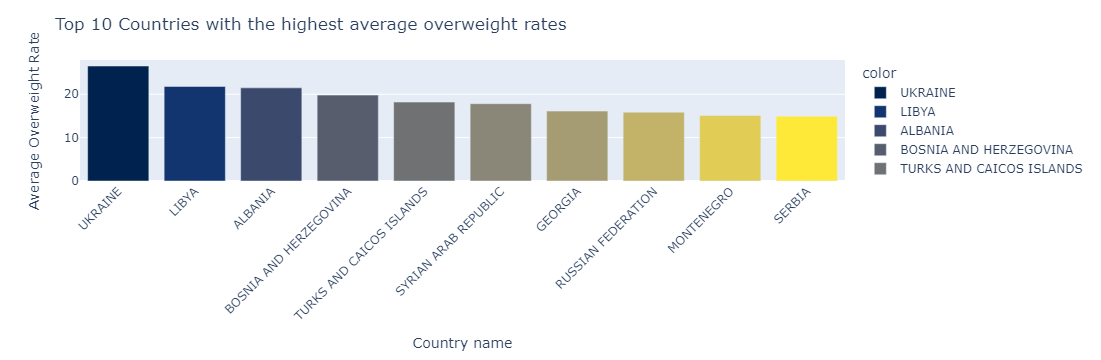

In [8]:
top_countries_overweight = malnutrition_df.groupby('Country and areas')['Overweight'].mean().nlargest(10).index
y_values_overweight = malnutrition_df.groupby('Country and areas')['Overweight'].mean().round(2).loc[top_countries_overweight]

fig_overweight = px.bar(malnutrition_df, x=top_countries_overweight, y=y_values_overweight,color=top_countries_overweight, color_discrete_sequence=px.colors.sequential.Cividis)

fig_overweight.update_layout(
    title="Top 10 Countries with the highest average overweight rates",
    xaxis_title="Country name",
    yaxis_title="Average Overweight Rate",
    xaxis=dict(tickangle=-45),
)
fig_overweight.show()

#### 3. Countries with the highest average wasting rates

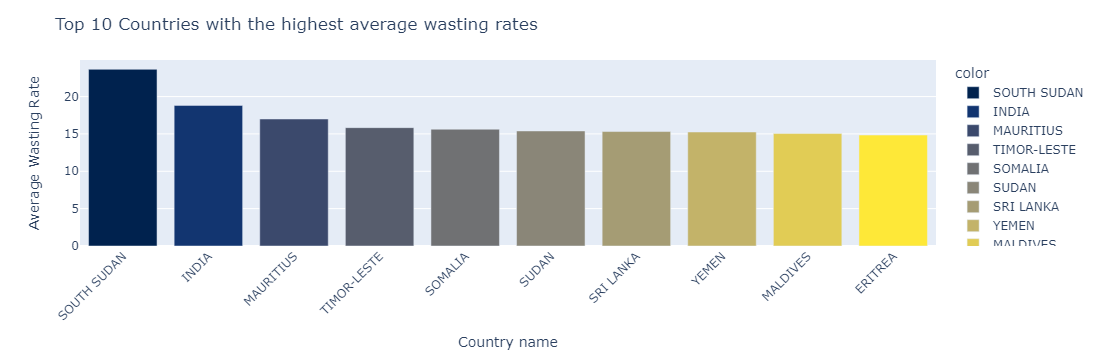

In [9]:
top_countries_wasting = malnutrition_df.groupby('Country and areas')['Wasting'].mean().nlargest(10).index
y_values_wasting = malnutrition_df.groupby('Country and areas')['Wasting'].mean().round(2).loc[top_countries_wasting]

fig_wasting = px.bar(malnutrition_df, x=top_countries_wasting, y=y_values_wasting,color=top_countries_wasting, color_discrete_sequence=px.colors.sequential.Cividis)

fig_wasting.update_layout(
    title="Top 10 Countries with the highest average wasting rates",
    xaxis_title="Country name",
    yaxis_title="Average Wasting Rate",
    xaxis=dict(tickangle=-45),
)
fig_wasting.show()

#### 4. Countries with the highest average underweight rates

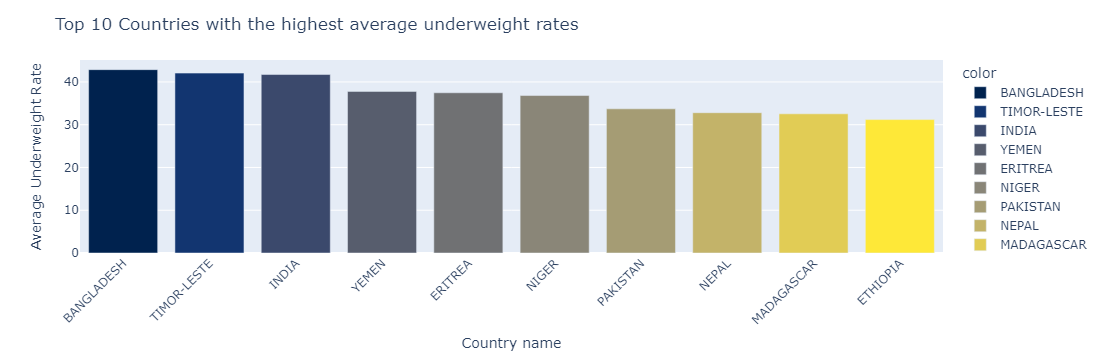

In [10]:
top_countries_underweight = malnutrition_df.groupby('Country and areas')['Underweight'].mean().nlargest(10).index
y_values_underweight = malnutrition_df.groupby('Country and areas')['Underweight'].mean().round(2).loc[top_countries_underweight]

fig_underweight = px.bar(malnutrition_df,x=top_countries_underweight,y=y_values_underweight,color=top_countries_underweight, color_discrete_sequence=px.colors.sequential.Cividis)

fig_underweight.update_layout(
    title="Top 10 Countries with the highest average underweight rates",
    xaxis_title="Country name",
    yaxis_title="Average Underweight Rate",
    xaxis=dict(tickangle=-45),
)
fig_underweight.show()

#### 5. Countries with the highest average malnutrition rates

* Eritrea: The average malnutrition rate in Eritrea is 26.56. This is likely due to a number of factors, including poverty, conflict, and drought.
* Timor-Leste: The average malnutrition rate in Timor-Leste is 28.76. This is also likely due to poverty, as well as a lack of access to clean water and sanitation.
* Bangladesh: The average malnutrition rate in Bangladesh is 27.2. This is due to a number of factors, including poverty, flooding, and a lack of access to education.
* India: The average malnutrition rate in India is 27.76. This is due to a number of factors, including poverty, a large population, and a lack of access to healthcare.
* Yemen: The average malnutrition rate in Yemen is 27.44. This is likely due to the ongoing civil war, which has caused widespread food insecurity.

Malnutrition is a serious problem that can have a number of negative consequences, including stunted growth, weakened immune systems, and increased vulnerability to disease. It is important to address the root causes of malnutrition in order to improve the lives of people in these countries.


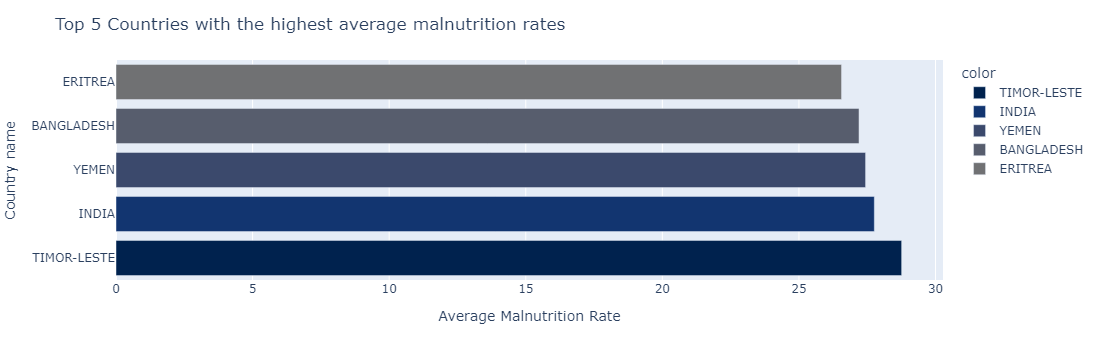

In [11]:
# Calculate the average of the four columns
malnutrition_df['Overall malnutrition rate'] = malnutrition_df[['Overweight', 'Underweight', 'Wasting', 'Stunting']].mean(axis=1).round(2)

# Find the top 10 countries with the highest average
top_countries_average = malnutrition_df.groupby('Country and areas')['Overall malnutrition rate'].mean().nlargest(5).index
y_values_average = malnutrition_df.groupby('Country and areas')['Overall malnutrition rate'].mean().round(2).loc[top_countries_average]

fig_average = px.bar(
    malnutrition_df, 
    y=top_countries_average,  
    x=y_values_average,      
    color=top_countries_average,
    orientation='h',
    color_discrete_sequence=px.colors.sequential.Cividis
)

fig_average.update_layout(
    title="Top 5 Countries with the highest average malnutrition rates",
    yaxis_title="Country name",
    xaxis_title="Average Malnutrition Rate",
)

fig_average.show()


#### This map visualizes average malnutrition rates among children in different countries

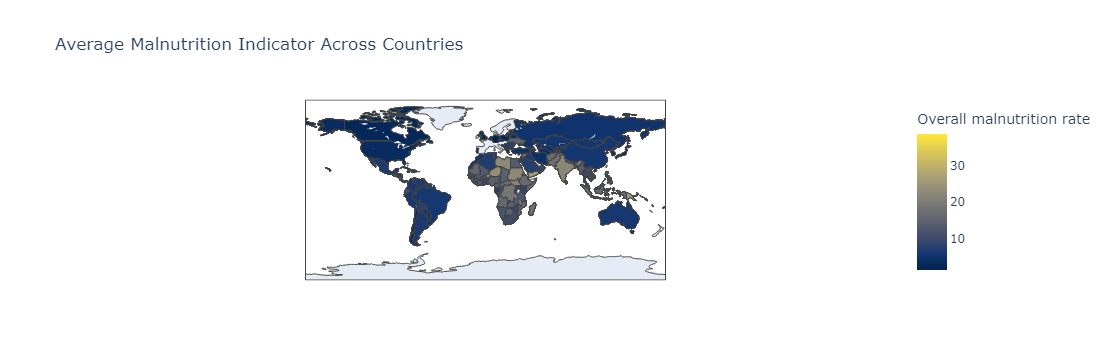

In [12]:
# Create a choropleth map based on the average values
fig = px.choropleth(
    malnutrition_df,
    locations='ISO code',
    color='Overall malnutrition rate',
    hover_name='Country and areas',
    title='Average Malnutrition Indicator Across Countries',
    color_continuous_scale=px.colors.sequential.Cividis,
    labels={'Average': 'Average Malnutrition Indicator'}
)
fig.show()

#### Average Malnutrition Rate by World Bank Income Classification

* **Low-income countries** have the highest average malnutrition rate, at 38%. This is likely due to a number of factors, including poverty, conflict, and drought.
* **Lower-middle-income countries** have the second-highest average malnutrition rate, at 33%. This is also likely due to poverty, as well as a lack of access to clean water and sanitation.
* **Upper-middle-income countries** have an average malnutrition rate of 18.5%. This is lower than the two lower income groups, but still significantly higher than the high-income group.
* **High-income countries** have the lowest average malnutrition rate, at 10.4%. This is likely due to a number of factors, including wealth, access to food, and education.

As you can see, there is a strong correlation between income and malnutrition. The lower the income, the higher the malnutrition rate. This is a complex issue with no easy solutions, but it is important to be aware of the problem and to work towards solutions.

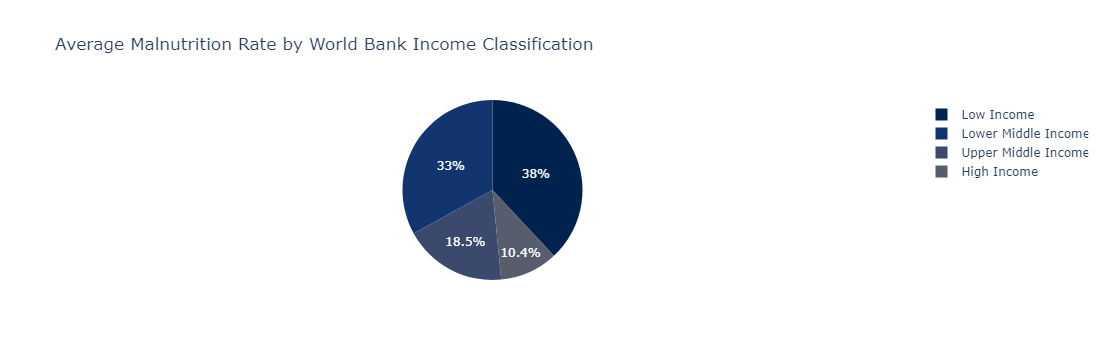

In [13]:
import plotly.express as px

# Calculate the average malnutrition rate for each income classification
avg_malnutrition_by_income = malnutrition_df.groupby('World Bank Income Classification')['Overall malnutrition rate'].mean().round(2).reset_index()

fig_pie_avg_by_income = px.pie(
    avg_malnutrition_by_income,
    names='World Bank Income Classification',
    values='Overall malnutrition rate',
    title='Average Malnutrition Rate by World Bank Income Classification',
    color_discrete_sequence=px.colors.sequential.Cividis
)
fig_pie_avg_by_income.show()


#### Malnutrition Trend Over Time
The following plot chart is a line graph that shows the trends in malnutrition rates over time for five different malnutrition categories: underweight, overweight, severe wasting, wasting, and stunting. The data is from 1983 to 2022.
* Overall, there has been a significant decline in malnutrition rates over time for all five categories. This is a positive trend that suggests that global efforts to reduce malnutrition are having an impact.
* The largest declines have been seen in underweight and severe wasting. These categories have both seen declines of more than 50% since 1985.
* Overweight rates have increased over time. This is a concerning trend, as overweight and obesity are also associated with a number of health problems.
* Wasting and stunting rates have also declined, but not as much as underweight and severe wasting. This suggests that there is still more work to be done in these areas.

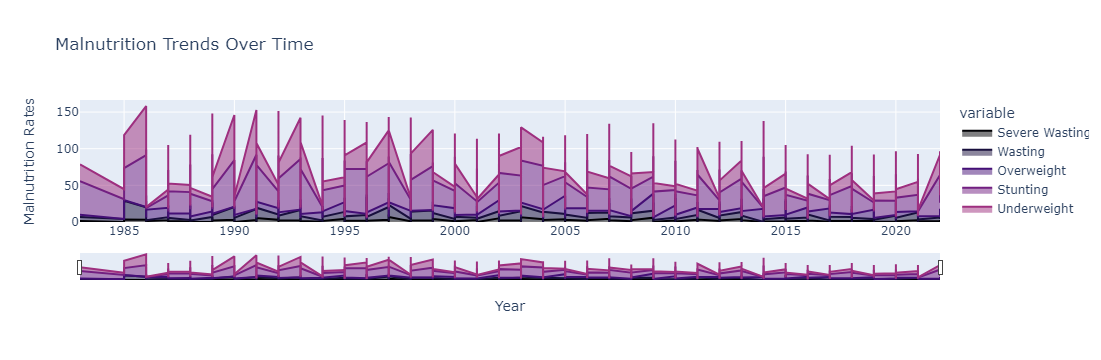

In [14]:
malnutrition_cols = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']

fig = px.area(
    malnutrition_df,
    x='Year*',
    y=malnutrition_cols,
    title='Malnutrition Trends Over Time',
    labels={'value': 'Malnutrition Rates'},
    color_discrete_sequence=px.colors.sequential.Magma,
)

fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Malnutrition Rates'),
    xaxis_rangeslider_visible=True, 
).show()

#### Correlation Heatmap of Malnutritional Indicators

* **Severe wasting and wasting are strongly positively correlated (0.83).** This means that children who are severely wasted are also likely to be wasted. This is likely due to the fact that the same factors that contribute to severe wasting, such as poverty, lack of access to food, and repeated infections, also contribute to wasting.
* **Wasting and underweight are also strongly positively correlated (0.83).** This means that children who are wasted are also likely to be underweight. This is again likely due to the fact that the same factors that contribute to wasting also contribute to underweight.
* **There is a weak negative correlation between overweight and stunting (-0.38).** This means that children who are overweight are less likely to be stunted. This is a somewhat surprising finding, as overweight and stunting are often thought to be two sides of the same coin, known as the "double burden of malnutrition." However, it is possible that there is a protective effect of being overweight in early childhood, as it may provide a buffer against stunting later in life.
* **There is a strong positive correlation between stunting and underweight (0.85).** This means that children who are stunted are also likely to be underweight. This is likely due to the fact that the same factors that contribute to stunting, such as chronic malnutrition and repeated infections, also contribute to underweight.

Overall, the correlation matrix suggests that there is a strong relationship between different forms of malnutrition. This suggests that interventions to reduce malnutrition need to be comprehensive and address the underlying causes of multiple forms of malnutrition.


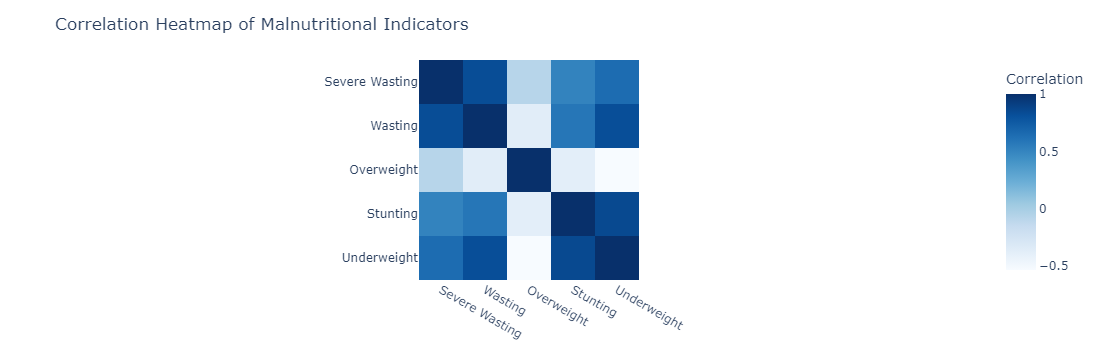

In [15]:
heatmap_data = malnutrition_df[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']]

fig = px.imshow(heatmap_data.corr(), x=heatmap_data.columns, y=heatmap_data.columns,
                labels=dict(color='Correlation'), color_continuous_scale='Blues') 

fig.update_layout(title='Correlation Heatmap of Malnutritional Indicators')
fig.show()

#### Exploration of Malnutrition Indicator Relationships Across World Bank Regions

The following scatter matrix provides in-depth insights into the correlation between the given variables, offering a comprehensive view of malnutrition indicators across World Bank Regions.


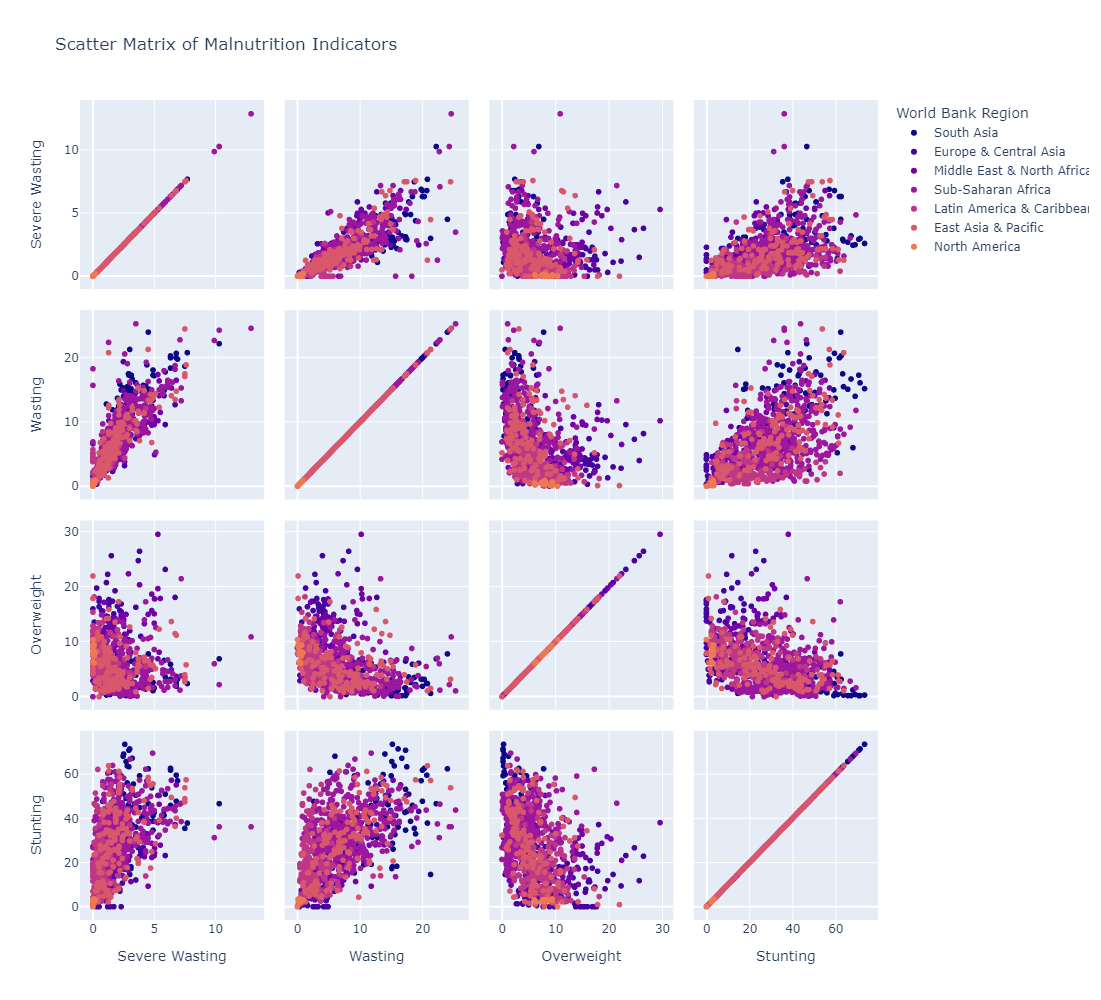

In [16]:
fig = px.scatter_matrix(
    malnutrition_df,
    dimensions=['Severe Wasting', 'Wasting', 'Overweight', 'Stunting'],
    color='World Bank Region',
    title='Scatter Matrix of Malnutrition Indicators',
    color_discrete_sequence=px.colors.sequential.Plasma,
    height=1000, 
    width=1000    
)
fig.show()

#### Malnutrition Rates by UNICEF Region
- SA: South Asia
- ECA: Europe and Central Asia
- MENA: Middle East and North Africa
- SSA: Sub-Saharan Africa
- LAC: Latin America and the Caribbean
- EAP: East Asia and Pacific

The graph illustrates that Southern Asia has the highest rates of stunting, severe wasting, overweight, and wasting, with Sub-Saharan Africa following closely. In terms of overweight prevalence, Eastern and Central Africa (ECA) takes the lead, followed by the Middle East and North Africa (MENA).

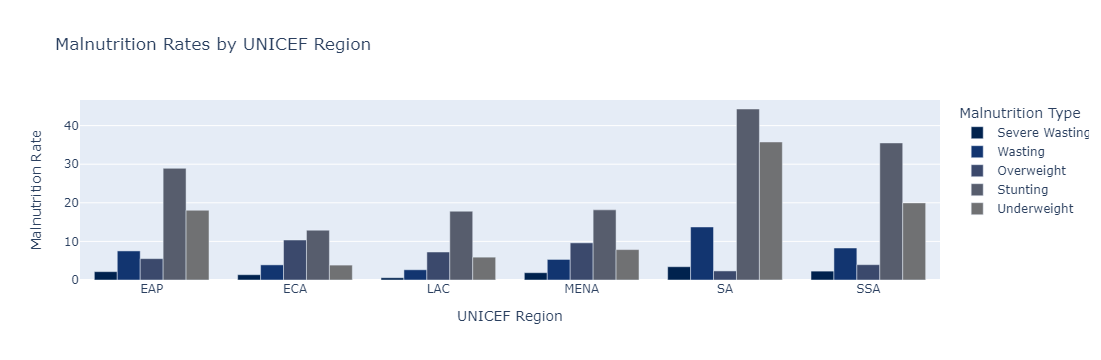

In [17]:
fig = px.bar(
    malnutrition_df.groupby('UNICEF Region')[malnutrition_cols].mean().round(2).reset_index().melt(id_vars='UNICEF Region', var_name='Malnutrition Type', value_name='Malnutrition Rate'),
    x='UNICEF Region',
    y='Malnutrition Rate',
    color='Malnutrition Type',
    barmode='group',
    title='Malnutrition Rates by UNICEF Region',
    color_discrete_sequence=px.colors.sequential.Cividis
)
# Show the plot
fig.show()

#### Summary of Malnutrition factors for top 5 SDG regions with highest population of children under the age of 5

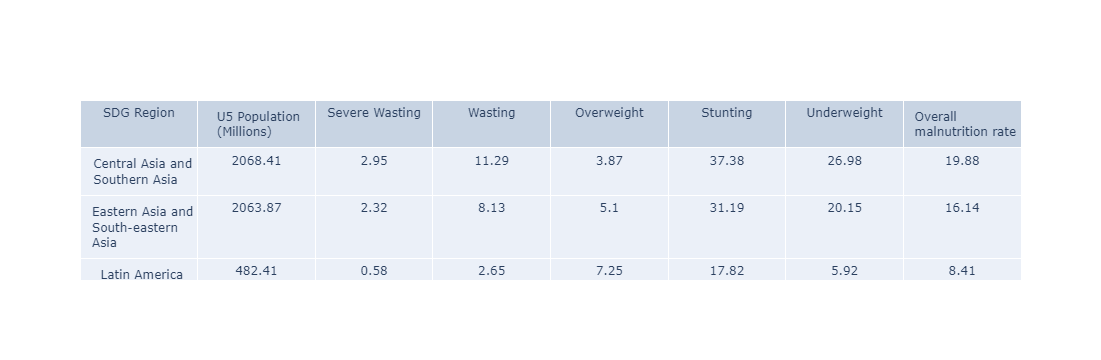

In [18]:
# Convert 'U5 Population (\'000s)' to millions
malnutrition_df['U5 Population (Millions)'] = malnutrition_df['U5 Population (\'000s)'] / 1000

# Group by SDG Region and calculate the sum of U5 Population in millions
total_sdg_population = malnutrition_df.groupby('SDG Region')['U5 Population (Millions)'].sum()

# Find the top 5 SDG Regions with the highest U5 Population
top_regions_df = malnutrition_df[malnutrition_df['SDG Region'].isin(total_sdg_population.nlargest(5).index)]

# Calculate the average malnutrition rate for each region
avg_malnutrition = top_regions_df.groupby('SDG Region')[malnutrition_cols + ['Overall malnutrition rate']].mean().reset_index()

# Create and show the table using Plotly
table = go.Figure(data=[go.Table(
    header=dict(values=['SDG Region'] + ['U5 Population (Millions)'] + malnutrition_cols + ['Overall malnutrition rate']),
    cells=dict(values=[avg_malnutrition['SDG Region']] 
               + [total_sdg_population.loc[avg_malnutrition['SDG Region']].round(2).tolist()] 
               + [avg_malnutrition[col].round(2).tolist() for col in malnutrition_cols 
               + ['Overall malnutrition rate']])
)]).show()

### Comparison between malnutrition column pairs

#### 1. Relationship between Wasting and Underweight Prevalence
Southern Asia exhibits the highest prevalence of both wasting and underweight. A consistent correlation is observed between wasting and underweight, indicating that nations with elevated wasting rates often experience concurrently high underweight rates. Nonetheless, certain exceptions exist within this pattern. 

In [19]:
fig = px.scatter(
    malnutrition_df,
    x='Wasting',
    y='Underweight',
    color='United Nations Sub-Region',
    size='U5 Population (\'000s)',
    title='Correlation between Wasting and Underweight',
    labels={'Wasting': 'Wasting', 'Underweight': 'Underweight'},
    hover_data=['Country and areas', 'Survey year']
)
fig.show()

#### 2. Correlation between Underweight and Stunting
Southern Asia exhibits the highest prevalence of both Underweight and Stunting. A consistent correlation is observed between Underweight and Stunting, indicating that nations with elevated Underweight rates often experience concurrently high Stunting rates. Nonetheless, certain exceptions exist within this pattern.

In [20]:
fig = px.scatter(
    malnutrition_df,
    x='Underweight',
    y='Stunting',
    color='United Nations Sub-Region',
    size='U5 Population (\'000s)',
    title='Correlation between Underweight and Stunting',
    labels={'Underweight': 'Underweight', 'Stunting': 'Stunting'},
    hover_data=['Country and areas', 'Survey year']
)
fig.show()

#### 3. Correlation between Wasting and Stunting
Southern Asia exhibits the highest prevalence of both Wasting and Stunting. A consistent correlation is observed between Wasting and Stunting, indicating that nations with elevated Wasting rates often experience concurrently high Stunting rates. Nonetheless, certain exceptions exist within this pattern.

In [21]:
fig = px.scatter(
    malnutrition_df,
    x='Wasting',
    y='Stunting',
    color='United Nations Sub-Region',
    size='U5 Population (\'000s)',
    title='Correlation between Wasting and Stunting',
    labels={'Severe Wasting': 'Wasting', 'Stunting': 'Stunting'},
    hover_data=['Country and areas', 'Survey year']
)
fig.show()